# Challenge de detección de latidos

Se deberán clasificar unos latidos de test en las siguientes categorías:

N		Normal beat (displayed as "·" by the PhysioBank ATM, LightWAVE, pschart, and psfd)  
R		Right bundle branch block beat  
A		Atrial premature beat  
V		Premature ventricular contraction  

Para lo cual se cuenta con los siguientes datos de entrenamiento:

signals_train.pkl: una lista que en cada elemento contiene 12 derivaciones de un mismo latido. Es decir, para un latido en particular, se tienen 12 mediciones en puntos distintos del cuerpo.

annotations_train.pkl: una lista que contiene,para cada elemento de la lista anterior, la clasificación en {N, R, A, V} de el latido correspondiente.

patients_train.pkl: una lista que contiene, para cada elemento de la lista de señales, un string que identifica al paciente al que se le midió ese latido.

Para testing se brinda la siguiente información:

signals_test.pkl: idem signals_train.pkl

patients_test.pkl: idem patients_train.pkl

Aclaración:
Debido a problemas en el dataset original, fueron removidos los pacientes 4, 17, 35, 44, 57, 72 y 74, ya que sus anotaciones contenían errores. No se preocupen cuando no los vean.

Se deberá subir un archivo .csv que contenga dos columnas:

id, type

La columna id deberá contener el número de ítem de signals_test.pkl que se clasificó
La columna type deberá tener la clasificación que se le dió al latido nro id de la lista en signals_test.pkl

Se adjunta como ejemplo un archivo sample.csv con el formato que se deberá subir para ser evaluado.
Se evaluará el accuracy de clasificación de los latidos entregados en el subset de test. Dichos latidos son 20186.

In [2]:
# Cargo los datos de train

import pickle
with open("data/signals_train.pkl", 'rb') as f:
        lat=pickle.load(f)
with open("data/annotations_train.pkl", 'rb') as f:
        ann=pickle.load(f)
with open("data/patients_train.pkl", 'rb') as f:
        pat=pickle.load(f)

In [3]:
#print (lat.shape)

Latido nro: 81168
El latido es del tipo: N
El latido pertenece al paciente I38
Cantidad de latidos totales 135977


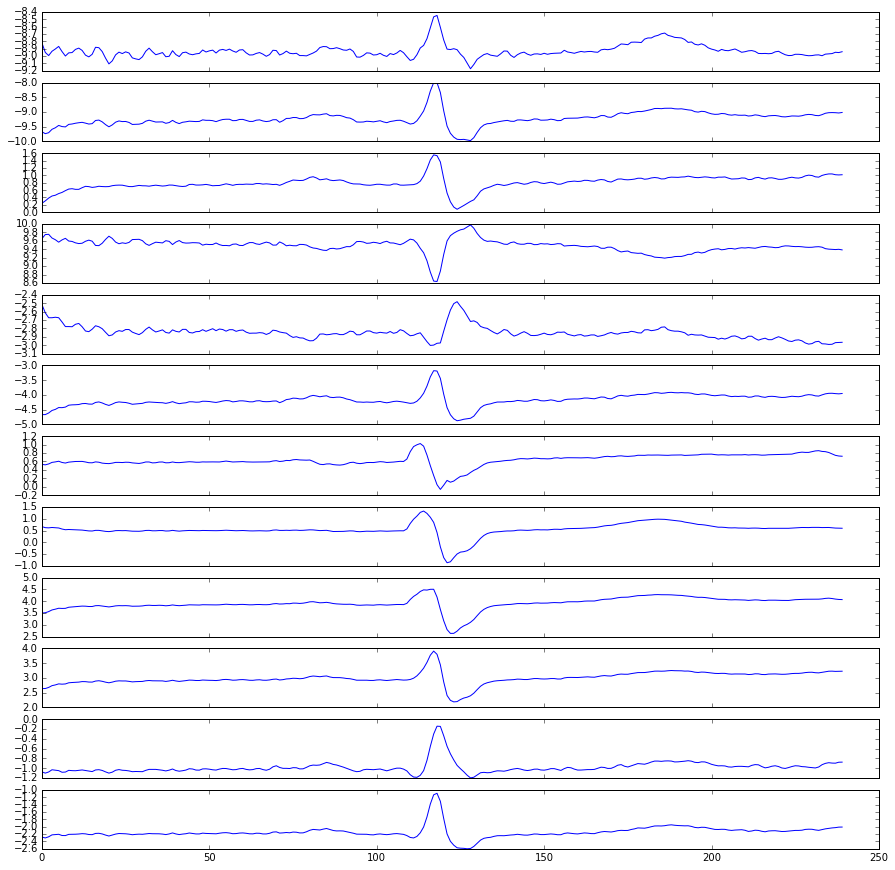

In [4]:
# Grafico el latido nro lat_idx
%matplotlib inline
import numpy as np
from random import randint
import matplotlib.pyplot as plot
lat_idx=randint(0,len(lat))
f, axarr = plot.subplots(12, sharex=True)
f.set_figheight(15)
f.set_figwidth(15)
print("Latido nro: {}".format(lat_idx))
print("El latido es del tipo: {}".format(ann[lat_idx]))
print("El latido pertenece al paciente {}".format(pat[lat_idx]))
print("Cantidad de latidos totales {}".format(len(lat)))
for i in range(12):
    axarr[i].plot(lat[lat_idx].T[i])
plot.show()


In [5]:
# Cargo los datos de test

import pickle
with open("data/signals_test.pkl", 'rb') as f:
        lat_test=pickle.load(f)
with open("data/patients_test.pkl", 'rb') as f:
        pat_test=pickle.load(f)

In [5]:
# Grafico el latido nro lat_idx
%matplotlib inline
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plot

In [8]:
# A continuación calculo la media y la varianza de cada elemento del vector de datos para poder normalizar

tam=240 # tamaño del latido
cant_canales=12
media=np.zeros((cant_canales,tam))
desv=np.zeros((cant_canales,tam))
# un latido, 12 canales

#Canal=0
#for i in range(0,2*tam):
#medias[lat_idx]=np.mean(lat[lat_idx].T[Canal])
#desv[lat_idx]=np.std(lat[lat_idx].T[Canal])

for Canal in range(cant_canales):
    media[Canal,:]=np.mean(lat[lat_idx].T[Canal])
    desv[Canal,:]=np.std(lat[lat_idx].T[Canal])

#print(media)
#print(desv)

In [9]:
# Normalizo cada latido y lo llevo a un numpy array

cantLatidos=len(lat)
latNorm=np.zeros([cant_canales,tam]) #Reservo espacio para la matriz de datos normalizados
print(latNorm.shape)
for Canal in range(cant_canales):
    latNorm[Canal]=lat[lat_idx].T[Canal]-np.ones(tam)*media[Canal,:]
    latNorm[Canal]=latNorm[Canal]/desv[Canal,:]
    

(12, 240)


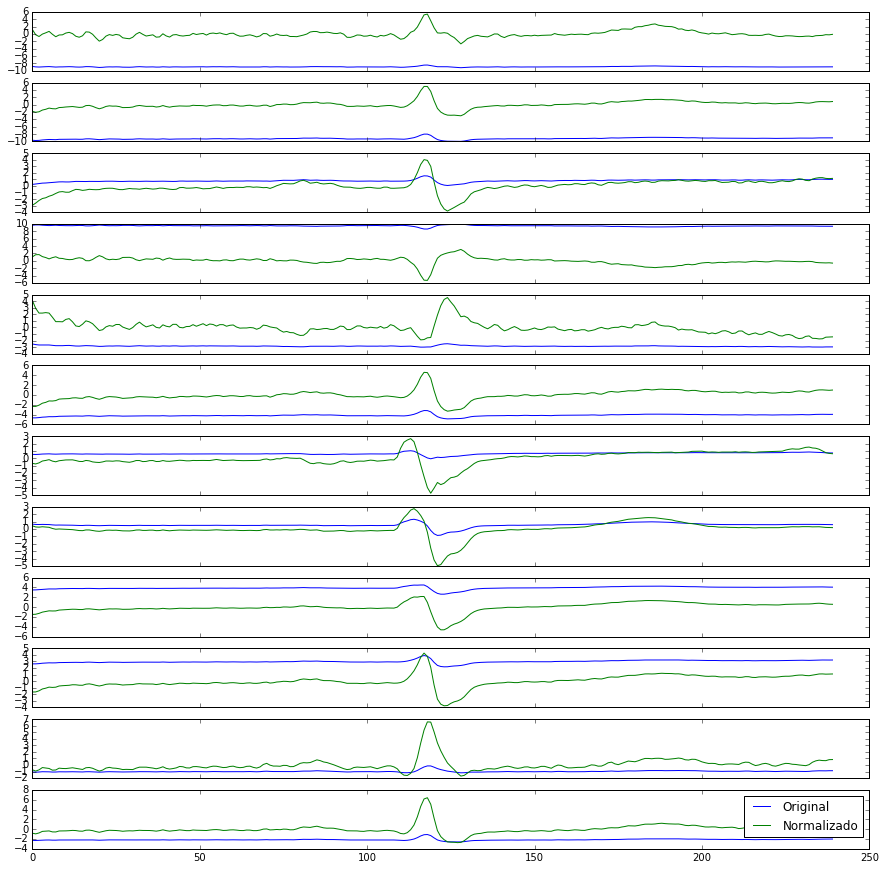

In [14]:
f, axarr = plot.subplots(12, sharex=True)
f.set_figheight(15)
f.set_figwidth(15)

for Canal in range(cant_canales):
    axarr[Canal].plot(lat[lat_idx].T[Canal],label='Original')
    axarr[Canal].plot(latNorm[Canal],label='Normalizado')
    #axarr[Canal].title('Canal:' + str(Canal) + ' - Latido:' + str(lat_idx))
    f.set_figheight(15)
    f.set_figwidth(15)
plot.legend()
plot.show()



In [15]:
from matplotlib.mlab import PCA
results = PCA(np.matrix.transpose(latNorm))

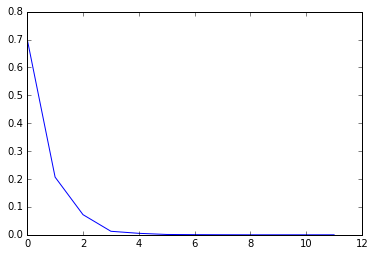

[  7.01175489e-01   2.06750894e-01   7.21762932e-02   1.26209813e-02
   5.28285470e-03   1.20646485e-03   5.72036742e-04   2.12672128e-04
   1.44235323e-06   6.19985789e-07   2.52483718e-07   2.29987554e-31]


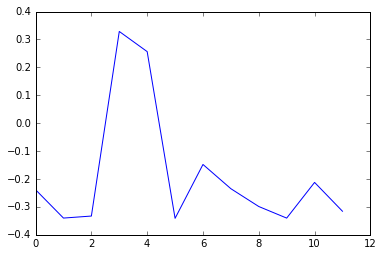

In [23]:
plot.plot(results.fracs)
plot.show()
#plot.plot(results.sigma-desv)
#plot.show()
print(results.fracs)
plot.plot(results.Wt[0])
#print(results.Wt)


Los canales 3 y 4 tienen mayor energía